In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
filename='lab_4_Ribberink_Deere_Macadam_Ng_Schmidt_Ayem_Lab4.csv'
headers=['time','batV','waterT','airT','calibrate']
dtypes = ['datetime', 'float','float','float','float']
df = pd.read_csv(filename,names=headers, usecols = [0,2,3,4,5],header=3)

# Question 1

In [3]:
df['Tdiff']=df['waterT']-df['airT']
# df['Tdiff']=df['airT']-df['waterT']

df = df.set_index('time')
time_coldT = df['2020-01-31 11:56:00': '2020-01-31 11:58:00']
time_roomT=df['2020-01-31 12:06:00': '2020-01-31 12:08:00']
time_hotT=df['2020-01-31 12:12:30': '2020-01-31 12:14:30']

all_times=[time_coldT,time_roomT,time_hotT]
df_clean=pd.concat(all_times)
df.reset_index(inplace=True)
time_coldT.reset_index(inplace=True)
time_hotT.reset_index(inplace=True)
# all_times.reset_index(inplace=True)
df_clean.reset_index(inplace=True)



# Question 2

In [4]:
def plot_temps(dfs,titles):
    i=0
    fig, ax = plt.subplots(nrows=len(dfs), ncols=1,figsize=(15,15))
    fig.subplots_adjust(hspace=.5)
    

    
    for df in dfs:
        x = df.Tdiff
        y = df.calibrate
        stats = linregress(x, y)
       
        m = stats.slope
        b = stats.intercept 
        print(titles[i])
        c0=-b/m,4
        c1=1/m
        print('c0 = ' + str(c0))
        print('c1 = ' + str(c1))

        # Change the default marker for the scatter from circles to x's
        ax[i].scatter(x, y, marker='.',color='#003F72')

        # Set the linewidth on the regression line to 3px
        ax[i].plot(x, m * x + b, color="red", linewidth=2)

        # Add x and y lables, and set their font size
        ax[i].set_xlabel("Difference in Temp ($^\circ$C)")
        ax[i].set_ylabel("Voltage (V)")
        ax[i].set_title(titles[i])
        
        s= 'Voltage= ' + str(round(m,4)) + '* $\Delta$ T + ' + str(round(b,4))   
        print('Transfer Eq: ' + s)
        c= '$\Delta$ T= ' + str(c1) + '* Voltage  + ' + str(c0) 
        print('Calibration Eq: ' + c)
        ax[i].grid(True)
        
        if i == 3:
            ax[i].text(min(x),max(y)-0.4,s,fontsize='14')
        else:
            ax[i].text(min(x),max(y),s,fontsize='14')
        
        i+=1
    
    return None


Cold Water Calibration
c0 = (-1.51349235012445, 4)
c1 = 14.324992954359123
Transfer Eq: Voltage= 0.0698* $\Delta$ T + 0.1057
Calibration Eq: $\Delta$ T= 14.324992954359123* Voltage  + (-1.51349235012445, 4)
Room Temp Calibration
c0 = (1.8318425705100907, 4)
c1 = 26.701072155417368
Transfer Eq: Voltage= 0.0375* $\Delta$ T + -0.0686
Calibration Eq: $\Delta$ T= 26.701072155417368* Voltage  + (1.8318425705100907, 4)
Hot Water Calibration
c0 = (4.459454495292464, 4)
c1 = 13.343223312667808
Transfer Eq: Voltage= 0.0749* $\Delta$ T + -0.3342
Calibration Eq: $\Delta$ T= 13.343223312667808* Voltage  + (4.459454495292464, 4)
All temps
c0 = (-0.15306742629421266, 4)
c1 = 16.40106559671608
Transfer Eq: Voltage= 0.061* $\Delta$ T + 0.0093
Calibration Eq: $\Delta$ T= 16.40106559671608* Voltage  + (-0.15306742629421266, 4)


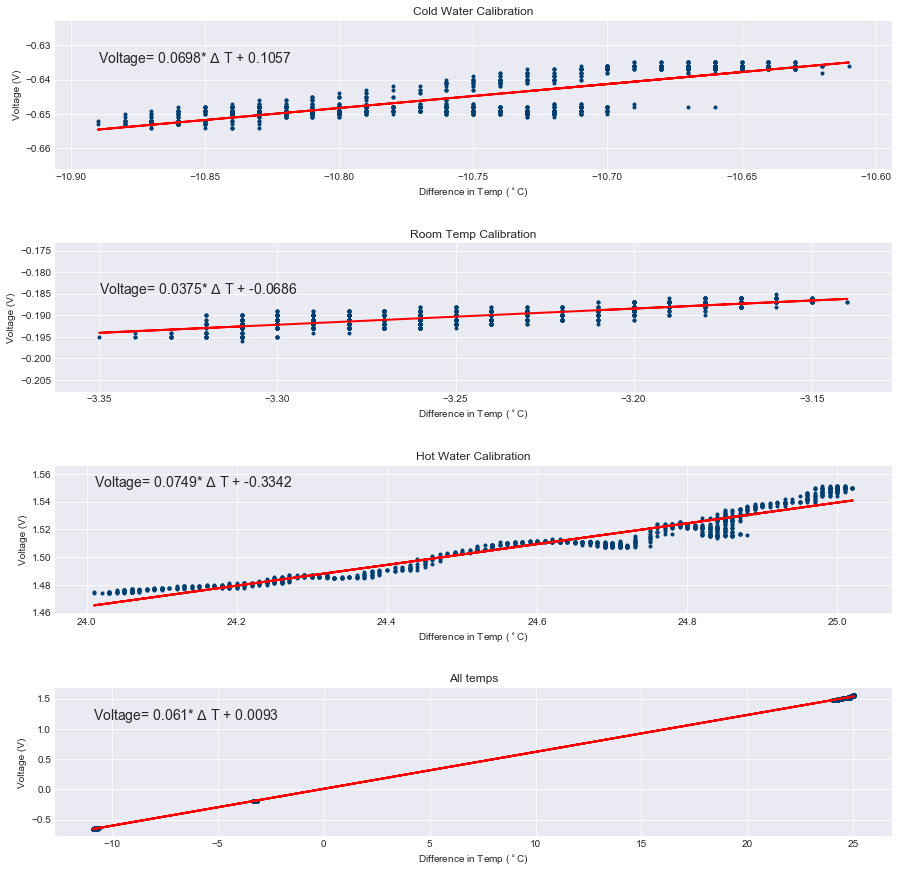

In [5]:
plt.style.use('seaborn-darkgrid')
plot_temps([time_coldT,time_roomT,time_hotT,df_clean],['Cold Water Calibration',
                                                        'Room Temp Calibration',
                                                        'Hot Water Calibration',
                                              'All temps'])

# Dynamic

In [6]:
df_clean['calibrated_T']=(16.40106559671608*df_clean['calibrate'])-0.15306742629421266

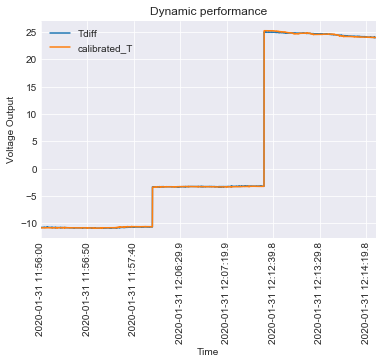

In [10]:
# multiple line plot
plt.style.use('seaborn-darkgrid')
df_clean.plot(x='time',y=['Tdiff','calibrated_T'],legend=True)
plt.xticks(rotation=90)
plt.ylabel('Voltage Output')
plt.xlabel('Time')
plt.title('Dynamic performance')
plt.savefig('Plot2.png')
